C:\Users\leewa\AppData\Local\Temp\ipykernel_18452\4271416974.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  #Convert string representation to datetime objects
C:\Users\leewa\AppData\Local\Temp\ipykernel_18452\4271416974.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])  #Convert string representation to datetime objects


Skipping column apply_date as conversion is not possible
Skipping column opportunity_start_date as conversion is not possible


c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


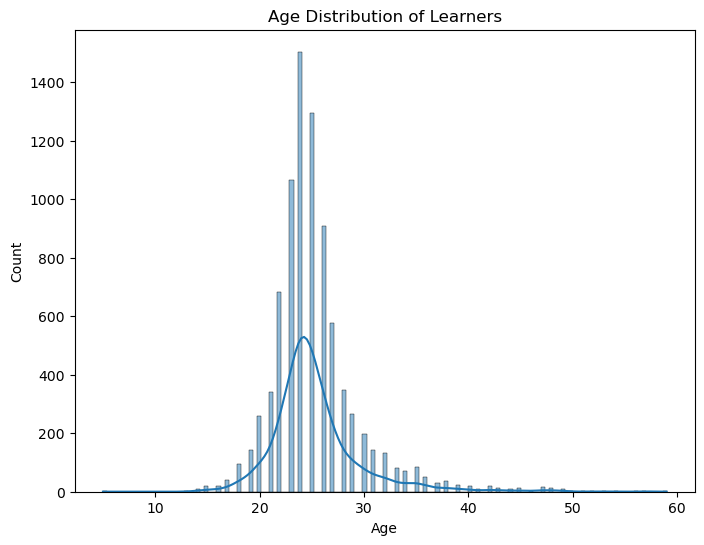

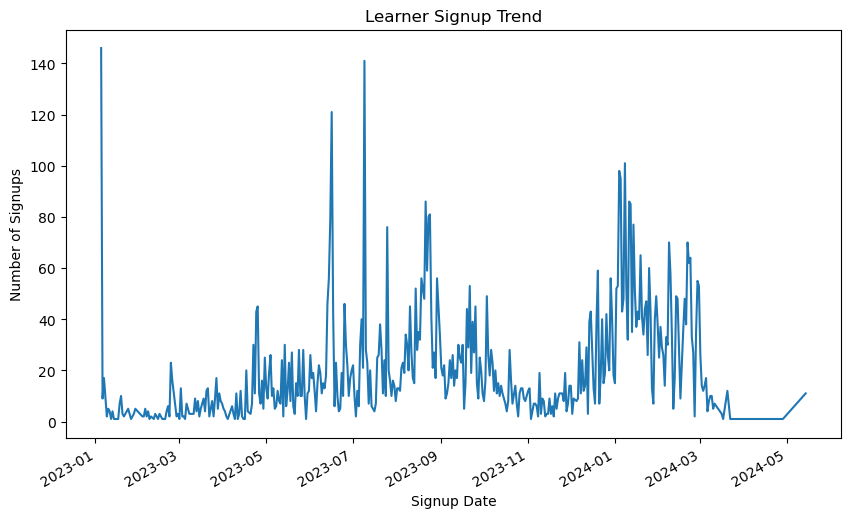

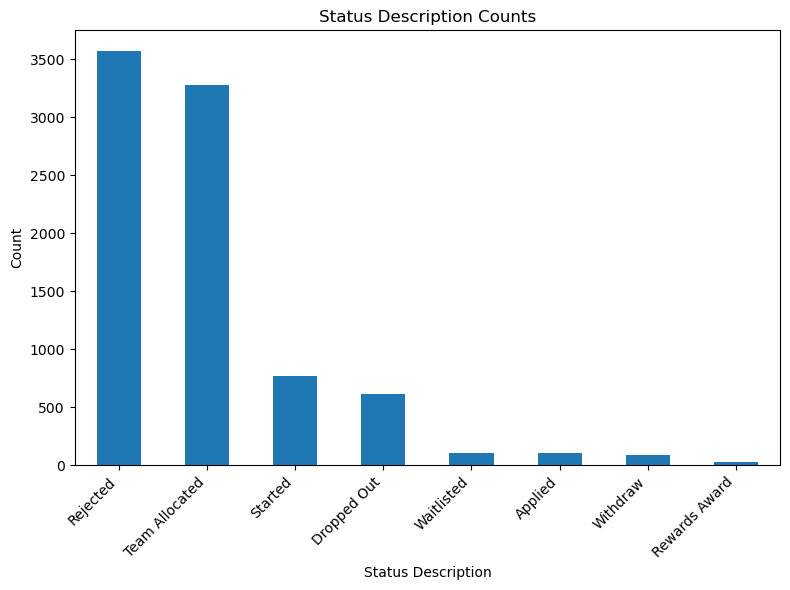

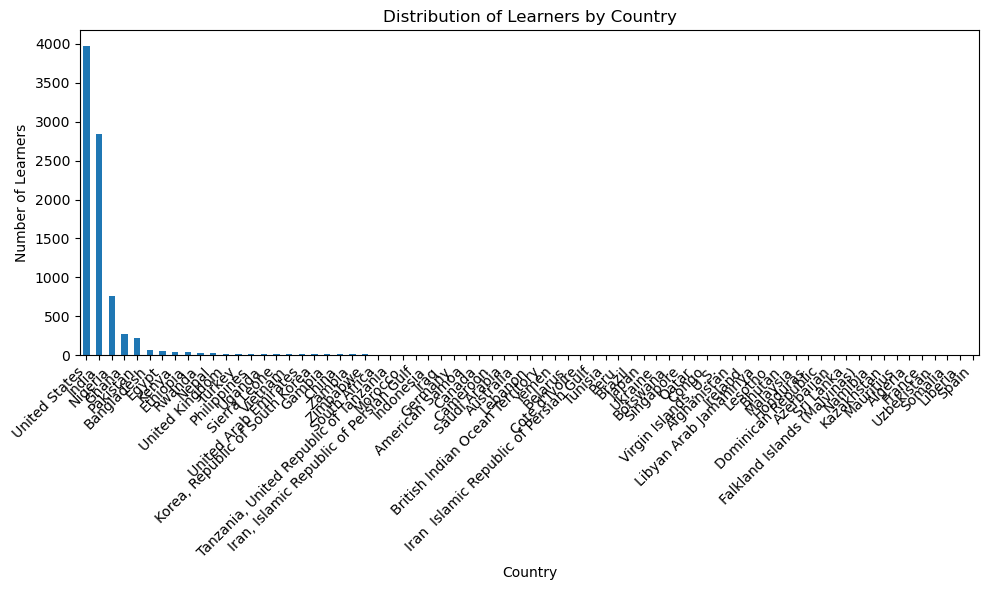

c:\Users\leewa\anaconda3\a cute anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


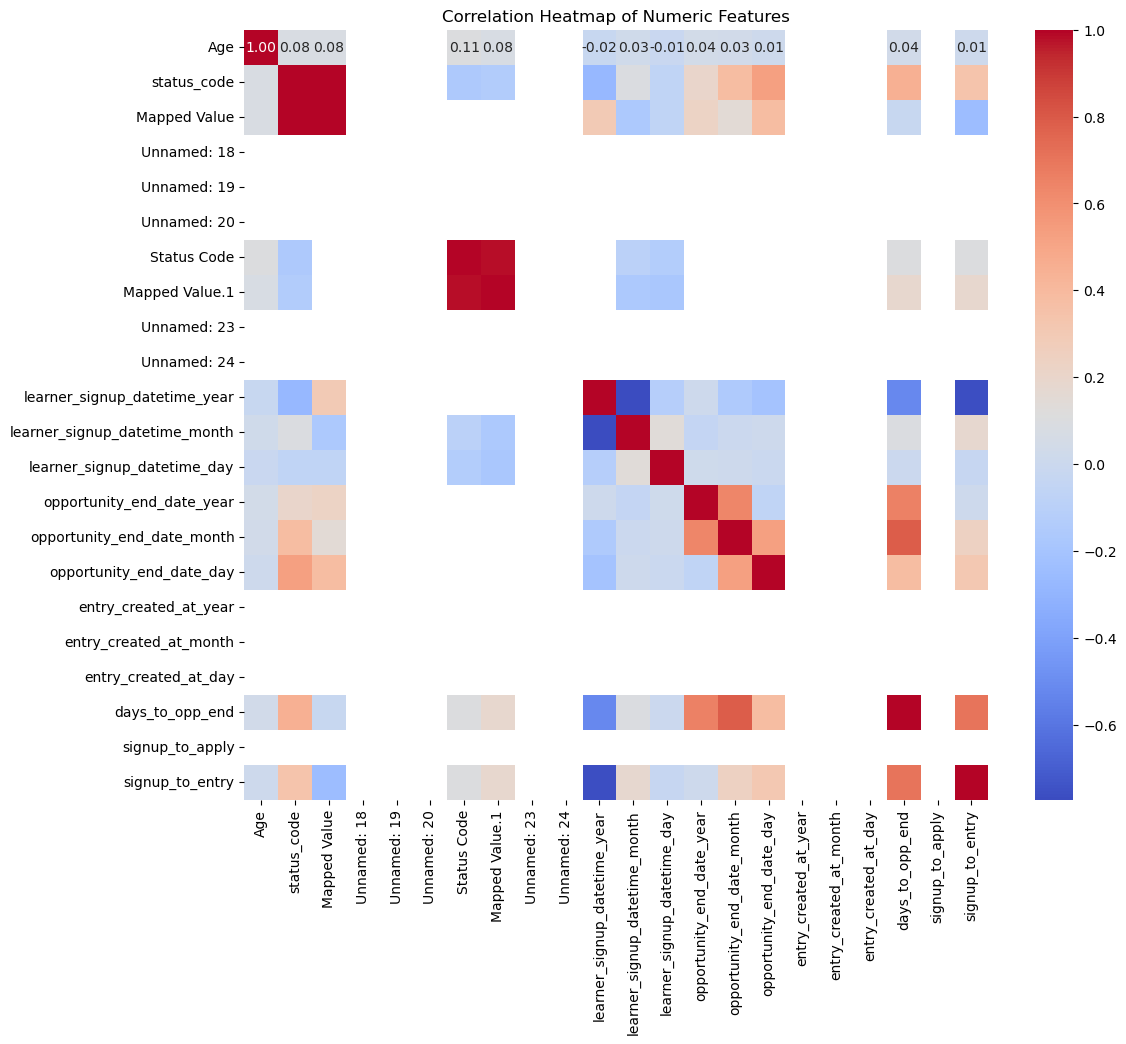

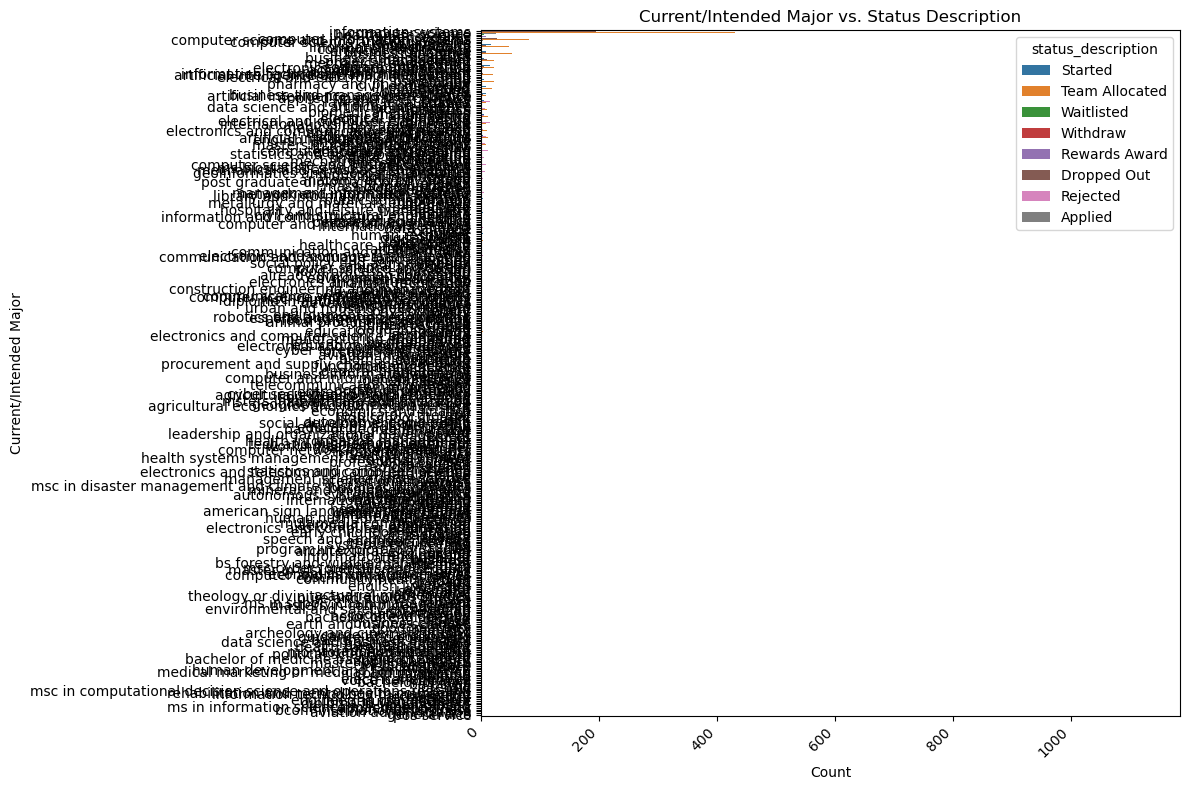

Feature engineering and visualization complete.


In [8]:
#Sourabh Vamdevan
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns

#pls load ur dataset here 

df = pd.read_csv('cleaned dataset.csv')

#Now this code will do feature engineering for us

#this will calculate where it is missing
def calculate_age(dob):
    if pd.isna(dob):
        return np.nan  #this will handle missings DOB's
    try:
        today = date.today()
        born = datetime.strptime(dob, "%m/%d/%Y").date()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    except ValueError:  
        return np.nan

df['Age'] = df.apply(lambda x: calculate_age(x['date_of_birth']) if pd.isna(x['Age']) else x['Age'], axis=1)

#this will extract datetime features.
for col in ['learner_signup_datetime', 'opportunity_end_date', 'entry_created_at', 'apply_date','opportunity_start_date']:
    try:
        df[col] = pd.to_datetime(df[col]) 
        df[col+'_year'] = df[col].dt.year
        df[col+'_month'] = df[col].dt.month
        df[col+'_day'] = df[col].dt.day
    except: 
        print(f"Skipping column {col} as conversion is not possible")

#this is for time differences.
def safe_days_diff(date1, date2):
    try:
        return abs((date1 - date2).days)
    except TypeError:  #this is for unknown types.
        return -9999

df['days_to_opp_end'] = df.apply(lambda row: safe_days_diff(row['learner_signup_datetime'], row['opportunity_end_date']), axis=1)
df['signup_to_apply'] = df.apply(lambda row: safe_days_diff(row['learner_signup_datetime'], row['apply_date']), axis=1)
df['signup_to_entry'] = df.apply(lambda row: safe_days_diff(row['learner_signup_datetime'], row['entry_created_at']), axis=1)


#this will encode categorical features.
df['gender'] = df['gender'].replace("Don't want to specify", "Other") 
for col in ['opportunity_category','gender','country','current/intended_major','status_description','Status Description']: # List the categorical columns
    dummies = pd.get_dummies(df[col], prefix=col)  #for creation of dummy variable.
    df = pd.concat([df, dummies], axis=1) 


for col in ['institution_name', 'Institution Name', 'current/intended_major', 'Current/Intended Major']:
    df[col] = df[col].str.lower().str.replace('[^a-zA-Z0-9\s]', '').str.strip()  # Lowercase, remove special characters, strip whitespace





#for age distribution.
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True) 
plt.title('Age Distribution of Learners')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


# this is for Signup Trend over Time
plt.figure(figsize=(10, 6))
df['learner_signup_datetime'].value_counts().sort_index().plot()
plt.title('Learner Signup Trend')
plt.xlabel('Signup Date')
plt.ylabel('Number of Signups')
plt.show()

# this is forr Status Description counts
plt.figure(figsize=(8, 6))
df['status_description'].value_counts().plot(kind='bar')
plt.title('Status Description Counts')
plt.xlabel('Status Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

# this is for Country Distribution
plt.figure(figsize=(10, 6))
df['country'].value_counts().plot(kind='bar')
plt.title('Distribution of Learners by Country')
plt.xlabel('Country')
plt.ylabel('Number of Learners')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()



#this is for corelation heatmaps.
numeric_df = df.select_dtypes(include=np.number) 
corr = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()




plt.figure(figsize=(12, 8))
sns.countplot(y='current/intended_major', hue='status_description', data=df, order=df['current/intended_major'].value_counts().index)
plt.title('Current/Intended Major vs. Status Description')
plt.xlabel('Count')
plt.ylabel('Current/Intended Major')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



#this will save feature engineering datasets (optional only)
df.to_csv("engineered_dataset.csv", index=False)


print("Feature engineering and visualization complete.")